## Importing the libraries

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import re
from tqdm import tqdm

import pandas as pd
import seaborn as sns
import gensim

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [7]:
df = pd.read_csv('Toxic Comment Classification/train.csv', skiprows=1, names=['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
df["comment_text"]

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [5]:
df.shape

(159571, 8)

In [6]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.corr()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


## Text Preprocessing

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Removing the stopwords
stop = stopwords.words('english')
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why edits made username Hardcore M...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches background colour I'm seemin...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really trying edit war. It's guy ...",0,0,0,0,0,0
3,0001b41b1c6bb37e,""" More I can't make real suggestions improveme...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, hero. Any chance remember page that'...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And second time asking, view completely ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You ashamed That horrible thing put talk page....,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer Umm, theres actual article prostitutio...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And looks like actually put speedy first versi...,0,0,0,0,0,0


In [10]:
# Performing Lemmatization

nltk.download('wordnet')

lemma = WordNetLemmatizer()
def lemmatize_words(text):
      words = text.split()
      words = [lemma.lemmatize(word,pos='v') for word in words]
      return ' '.join(words)
df['comment_text'] = df['comment_text'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jayva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why edit make username Hardcore Me...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He match background colour I'm seemingl...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really try edit war. It's guy con...",0,0,0,0,0,0
3,0001b41b1c6bb37e,""" More I can't make real suggestions improveme...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, hero. Any chance remember page that'...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And second time asking, view completely ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You ashamed That horrible thing put talk page....,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer Umm, theres actual article prostitutio...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And look like actually put speedy first versio...,0,0,0,0,0,0


In [11]:
classes = ['toxic', 'severe_toxic','obscene','threat','insult','identity_hate']
df[classes].sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [11]:
X = df.comment_text
Y = df.drop(['id', 'comment_text'], axis = 1)

In [12]:
corpus = df['comment_text'].to_numpy()
corpus

array(["Explanation Why edit make username Hardcore Metallica Fan reverted? They vandalisms, closure GAs I vote New York Dolls FAC. And please remove template talk page since I'm retire now.89.205.38.27",
       "D'aww! He match background colour I'm seemingly stick with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really try edit war. It's guy constantly remove relevant information talk edit instead talk page. He seem care format actual info.",
       ...,
       'Spitzer Umm, theres actual article prostitution ring. - Crunch Captain.',
       'And look like actually put speedy first version delete I look it.',
       '" And ... I really think understand. I come idea bad right away. What kind community go ""you bad ideas"" go away, instead help rewrite them. "'],
      dtype=object)

## Feature Extraction

In [17]:
# # Vectorizing text using TF-IDF Vectorization

#

# vectorizer = TfidfVectorizer(use_idf=True, max_tokens=MAX_FEATURES,
#                                output_sequence_length=1800,
#                                output_mode='int')

# X_train = vectorizer.fit(X_train)



In [13]:
from tensorflow.keras.layers import TextVectorization

MAX_FEATURES = 200000
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

vectorizer.adapt(X.values)
X = vectorizer(X.values)

In [14]:
dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [15]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

# Model Training

In [2]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Flatten, Dropout, Dense, LSTM, Embedding, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping



In [16]:
model = Sequential()

model.add(Embedding(MAX_FEATURES+1, 32))

model.add(Bidirectional(LSTM(32, activation='tanh')))

model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(6, activation='sigmoid'))

In [17]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                      

In [24]:
es = EarlyStopping(patience=3,
                   monitor='loss',
                   restore_best_weights=True,
                   mode='min',
                   verbose=1)

# train the model
hist = model.fit(train, validation_data = val, epochs = 3, callbacks=es, batch_size = 32, shuffle=True)

Epoch 1/3
6981/6981 [==============================] - 771s 109ms/step - loss: 0.0606 - val_loss: 0.0467
Epoch 2/3
6981/6981 [==============================] - 651s 93ms/step - loss: 0.0449 - val_loss: 0.0380
Epoch 3/3
6981/6981 [==============================] - 637s 91ms/step - loss: 0.0388 - val_loss: 0.0320


<Figure size 800x500 with 0 Axes>

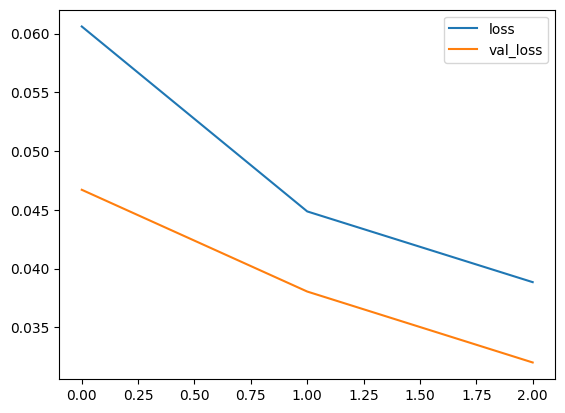

In [25]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(hist.history).plot()
plt.show()


In [ ]:
# from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

# pre = Precision()
# re = Recall()
# acc = CategoricalAccuracy()

# for batch in test.as_numpy_iterator():
#     # Unpack the batch
#     X_true, y_true = batch
#     # Make a prediction
#     yhat = model.predict(X_true)

#     # Flatten the predictions
#     y_true = y_true.flatten()
#     yhat = yhat.flatten()

#     pre.update_state(y_true, yhat)
#     re.update_state(y_true, yhat)
#     acc.update_state(y_true, yhat)


# print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

In [ ]:
from keras.src.saving.saving_lib import load_model
import tensorflow as tf
# import gradio as gr


# model.save('toxicity.h5')



In [18]:
from keras.models import load_model

model = load_model('toxicity.h5', compile=False)


In [19]:
input_str = vectorizer('I love u')
res = model.predict(np.expand_dims(input_str,0))
res

array([[9.8899692e-02, 3.9479895e-05, 5.5875778e-03, 9.4875693e-04,
        7.1099102e-03, 1.9436777e-03]], dtype=float32)

In [20]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)

    return text

In [21]:
import gradio as gr
import tensorflow as tf

In [22]:
interface = gr.Interface(score_comment, 
                         gr.Textbox(),
                        'text',
                        title="Comments Toxicity")


In [23]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
